"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction/data?select=Travel.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Travel.csv.xls')
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

handle missing values

In [4]:
column_name=df.columns
column_name

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [5]:
print(df["Gender"].value_counts())
print(df["MaritalStatus"].value_counts())
print(df["TypeofContact"].value_counts())

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64


In [7]:
print(df["Gender"].value_counts())
print(df["MaritalStatus"].value_counts())

Gender
Male      2916
Female    1972
Name: count, dtype: int64
MaritalStatus
Married      2340
Divorced      950
unmarried     916
Unmarried     682
Name: count, dtype: int64


In [ ]:
df["Gender"].replace("Fe Male","Female",inplace=True)
df["MaritalStatus"].replace("Single","unmarried",inplace=True)

In [8]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>0]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5))

Age 4.62357
TypeofContact 0.51146
DurationOfPitch 5.13502
NumberOfFollowups 0.92062
PreferredPropertyStar 0.53191
NumberOfTrips 2.86416
NumberOfChildrenVisiting 1.35025
MonthlyIncome 4.76678


🔢 Formula Explained
1. df[feature].isnull()

This checks every row in the column for missing values (NaN) and returns:

True if the value is missing
False if the value is not missing
Example:

df["Age"].isnull()
Output: [False, True, False, False, True]
2. .mean()

When applied to a boolean Series (True, False), Python treats:

True as 1
False as 0
So .mean() calculates the average number of True values, i.e., the fraction of missing values.

Using the example:

[False, True, False, False, True] → [0, 1, 0, 0, 1]
.mean() = (0 + 1 + 0 + 0 + 1) / 5 = 0.4  →  40% missing
3. * 100

To convert that fraction (e.g., 0.4) into a percentage (e.g., 40.0).

4. np.round(..., 5)

This just rounds the result to 5 decimal places for cleaner output.



In [9]:
df[features_with_na].select_dtypes(exclude="object").describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [ ]:
Imputing Null values

Impute Median value for Age column
Impute Mode for Type of Contract
Impute Median for Duration of Pitch
Impute Mode for NumberofFollowup as it is Discrete feature
Impute Mode for PreferredPropertyStar
Impute mode for NumberofTrips
Impute Mode for NumberOfChildrenVisiting
Impute Median for MonthlyIncome

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
df["Age"].fillna(df["Age"].median(),inplace=True)
df["TypeofContact"].fillna(df["TypeofContact"].mode()[0],inplace=True)
df["DurationOfPitch"].fillna(df["DurationOfPitch"].median(),inplace=True)
df["NumberOfFollowups"].fillna(df["NumberOfFollowups"].mode()[0],inplace=True)
df["PreferredPropertyStar"].fillna(df["PreferredPropertyStar"].mode()[0],inplace=True)
df["NumberOfTrips"].fillna(df["NumberOfTrips"].mode()[0],inplace=True)
df["NumberOfChildrenVisiting"].fillna(df["NumberOfChildrenVisiting"].mode()[0],inplace=True)
df["MonthlyIncome"].fillna(df["MonthlyIncome"].median(),inplace=True)

In [11]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [12]:
df.drop("CustomerID",inplace=True,axis=1)

Feature Engineering and Feature Extraction

In [13]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [14]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,unmarried,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,unmarried,3.0,0,5,0,2.0,Executive,20289.0


In [15]:
df["Totalvisit"]=df["NumberOfPersonVisiting"]+df["NumberOfChildrenVisiting"]
df.drop(["NumberOfPersonVisiting","NumberOfChildrenVisiting"],axis=1,inplace=True)
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Totalvisit
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,unmarried,3.0,1,3,1,Executive,21212.0,6.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,unmarried,3.0,0,5,0,Executive,20289.0,5.0


In [16]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!="O"]
categorical_features=[feature for feature in df.columns if df[feature].dtypes=="O"]
print("numerical features",len(numerical_features))
print("categorical features",len(categorical_features))

numerical features 12
categorical features 6


In [17]:
descrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features=[feature for feature in numerical_features if feature not in descrete_features]
print("descrete_features",len(descrete_features))
print("continuous_features",len(continuous_features))

descrete_features 9
continuous_features 3


In [18]:
from sklearn.model_selection import train_test_split
X=df.drop(["ProdTaken"],axis=1)
y=df["ProdTaken"]

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Totalvisit
4367,27.0,Company Invited,2,24.0,Salaried,Female,4.0,Basic,3.0,Married,2.0,1,5,0,Executive,21419.0,5.0
641,32.0,Company Invited,3,11.0,Salaried,Male,3.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,21524.0,3.0
333,43.0,Self Enquiry,1,13.0,Salaried,Female,3.0,Standard,5.0,Divorced,1.0,0,5,1,Senior Manager,24985.0,2.0
33,39.0,Self Enquiry,3,11.0,Large Business,Male,3.0,Deluxe,3.0,Divorced,4.0,0,2,0,Manager,17086.0,3.0
3917,34.0,Company Invited,1,10.0,Salaried,Female,4.0,Basic,3.0,Married,3.0,1,1,1,Executive,21587.0,5.0


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [21]:
catfeatures=X.select_dtypes(include="object").columns
numfeatures=X.select_dtypes(exclude="object").columns
print(catfeatures)
print(numfeatures)

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')
Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'Totalvisit'],
      dtype='object')


In [23]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer #columntransformer is used applay mutple encoders
numeric_transformer=StandardScaler()
oh_tr=OneHotEncoder(drop="first")
preprocessor=ColumnTransformer([
    ("OneHotEncoder",oh_tr,catfeatures),
    ("StandardScaler",numeric_transformer,numfeatures)
])

In [ ]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
models={
    "RandomForestClassifier":RandomForestClassifier(),
}
for i in range(len(list(models))):
    model=list(mode.values())[i]
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print("accuracy score",accuracy_score(y_test,y_pred))
    print("classification report",classification_report(y_test,y_pred))
    print("confusion matrix",confusion_matrix(y_test,y_pred))
    print("\n")

accuracy score 0.9212678936605317
classification report               precision    recall  f1-score   support

           0       0.92      0.99      0.95       798
           1       0.96      0.60      0.74       180

    accuracy                           0.92       978
   macro avg       0.94      0.80      0.85       978
weighted avg       0.92      0.92      0.91       978

confusion matrix [[793   5]
 [ 72 108]]




hyperparameter tuning

In [31]:
rd_params={"max_depth":[5,8,None,10],
           "max_features":[5,7,"auto",8],
           "min_samples_split":[2,8,15,20],
           "n_estimators":[100,200,500,1000]}

In [33]:
randomcv=[
    ("RandomForestClassifier",RandomForestClassifier(),rd_params),
]

In [47]:
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(estimator=RandomForestClassifier(),
                                      param_distributions=rd_params,
                                        cv=3,
                                        n_iter=100,
                                        verbose=2,
                                        n_jobs=-1)
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=8, max_features=5, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=1000; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=1000; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=1000; total time=   0.0s
[CV] END max_depth=5, max_features=7, mi

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, None, 10],
                                        'max_features': [5, 7, 'auto', 8],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500, 1000]},
                   verbose=2)

In [37]:
ypred=random_search.predict(X_test)

In [38]:
print("accuracy score",accuracy_score(y_test,ypred))
print("classification report",classification_report(y_test,ypred))
print("confusion matrix",confusion_matrix(y_test,ypred))

accuracy score 0.9376278118609407
classification report               precision    recall  f1-score   support

           0       0.93      0.99      0.96       798
           1       0.96      0.69      0.80       180

    accuracy                           0.94       978
   macro avg       0.95      0.84      0.88       978
weighted avg       0.94      0.94      0.93       978

confusion matrix [[793   5]
 [ 56 124]]


In [43]:
from sklearn.metrics import roc_auc_score,roc_curve
roc_auc_score(y_test,ypred)

np.float64(0.841311612364244)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=8, max_features=5, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=8, max_features=5, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=8, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, max_features=5, min_

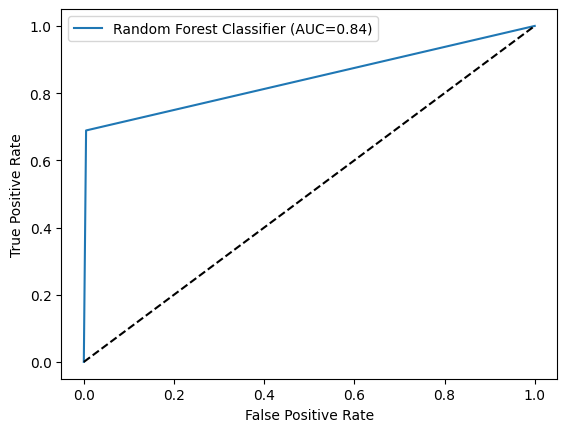

In [46]:
import warnings 
warnings.filterwarnings('ignore')
aucmodels=[{
    "label":"Random Forest Classifier",
    "model":random_search,
    "auc":roc_auc_score(y_test,ypred)
}]
for algo in aucmodels:
    modell=algo["model"]
    modell.fit(X_train,y_train)
    fpr,tpr,thersholds=roc_curve(y_test,modell.predict(X_test))
    plt.plot(fpr,tpr,label=f"{algo['label']} (AUC={algo['auc']:.2f})")
    plt.plot([0,1],[0,1],"k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

In [45]:
import warnings 
warnings.filterwarnings('ignore')